<a href="https://colab.research.google.com/github/JeffersonEspinalA/Prueba/blob/main/TF_Complex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-23-7d8cf50aa423>:9: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  infected_nodes = random.sample(graph.nodes(), initial_infected)


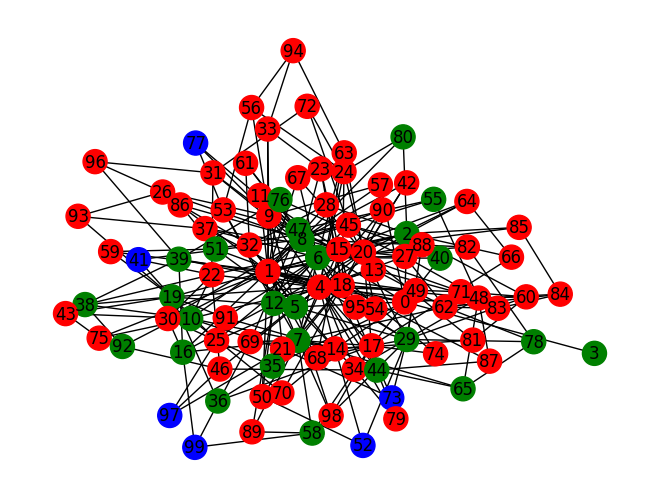

In [ ]:
import networkx as nx
import random
import matplotlib.pyplot as plt

def initialize_population(graph, initial_infected):
    population = {}
    for node in graph.nodes():
        population[node] = "S"  # Todos los nodos son susceptibles (S)
    infected_nodes = random.sample(graph.nodes(), initial_infected)
    for node in infected_nodes:
        population[node] = "I"  # Algunos nodos iniciales se marcan como infectados (I)
    return population

def simulate_spread(graph, population, infection_rate, recovery_rate, max_iterations):
    for _ in range(max_iterations):
        next_population = population.copy()
        for node in graph.nodes():
            if population[node] == "I":
                # Nodo infectado
                neighbors = list(graph.neighbors(node))
                for neighbor in neighbors:
                    if population[neighbor] == "S":
                        # Vecino susceptible
                        if random.random() < infection_rate:
                            next_population[neighbor] = "I"  # Se infecta
            if population[node] == "I":
                # Nodo infectado
                if random.random() < recovery_rate:
                    next_population[node] = "R"  # Se recupera
        population = next_population
    return population

def plot_population(graph, population):
    pos = nx.spring_layout(graph)
    node_colors = []
    for node in graph.nodes():
        if population[node] == "S":
            node_colors.append("blue")  # Susceptible: azul
        elif population[node] == "I":
            node_colors.append("red")  # Infectado: rojo
        else:
            node_colors.append("green")  # Recuperado: verde
    nx.draw(graph, pos, node_color=node_colors, with_labels=True)
    plt.show()

# Parámetros de simulación
N = 100  # Número de nodos
m = 3  # Número de enlaces que establece cada nodo
initial_infected = 1  # Número inicial de nodos infectados
infection_rate = 0.2  # Tasa de infección
recovery_rate = 0.1  # Tasa de recuperación
max_iterations = 10  # Número máximo de iteraciones

# Generar red Barabási–Albert
graph = nx.barabasi_albert_graph(N, m)

# Inicializar población
population = initialize_population(graph, initial_infected)

# Simular propagación del COVID-19
population = simulate_spread(graph, population, infection_rate, recovery_rate, max_iterations)

# Graficar población
plot_population(graph, population)


<ipython-input-1-26cba3a6d2be>:9: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  infected_nodes = random.sample(graph.nodes(), initial_infected)


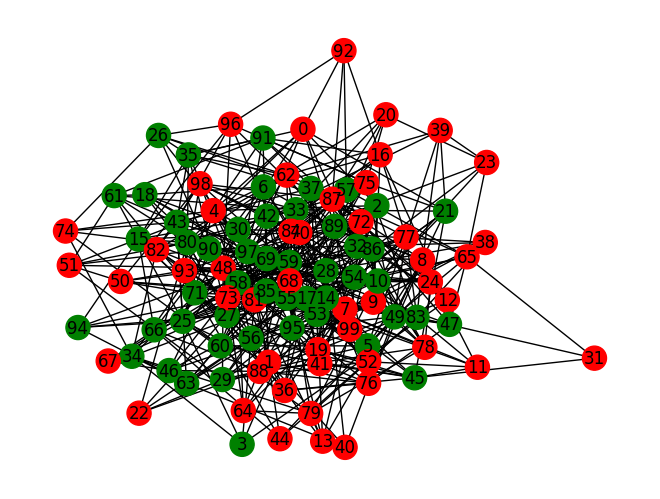

In [1]:
import networkx as nx
import random
import matplotlib.pyplot as plt

def initialize_population(graph, initial_infected):
    population = {}
    for node in graph.nodes():
        population[node] = "S"  # Todos los nodos son susceptibles (S)
    infected_nodes = random.sample(graph.nodes(), initial_infected)
    for node in infected_nodes:
        population[node] = "I"  # Algunos nodos iniciales se marcan como infectados (I)
    return population

def simulate_spread(graph, population, infection_rate, recovery_rate, max_iterations):
    for _ in range(max_iterations):
        next_population = population.copy()
        for node in graph.nodes():
            if population[node] == "I":
                # Nodo infectado
                neighbors = list(graph.neighbors(node))
                for neighbor in neighbors:
                    if population[neighbor] == "S":
                        # Vecino susceptible
                        if random.random() < infection_rate:
                            next_population[neighbor] = "I"  # Se infecta
            if population[node] == "I":
                # Nodo infectado
                if random.random() < recovery_rate:
                    next_population[node] = "R"  # Se recupera
        population = next_population
    return population

def plot_population(graph, population):
    pos = nx.spring_layout(graph)
    node_colors = []
    for node in graph.nodes():
        if population[node] == "S":
            node_colors.append("blue")  # Susceptible: azul
        elif population[node] == "I":
            node_colors.append("red")  # Infectado: rojo
        else:
            node_colors.append("green")  # Recuperado: verde
    nx.draw(graph, pos, node_color=node_colors, with_labels=True)
    plt.show()

# Parámetros de simulación
N = 100  # Número de nodos
p = 0.1  # Probabilidad de conexión entre dos nodos
initial_infected = 5  # Número inicial de nodos infectados
infection_rate = 0.2  # Tasa de infección
recovery_rate = 0.1  # Tasa de recuperación
max_iterations = 10  # Número máximo de iteraciones

# Generar red Erdos Renyi
graph = nx.erdos_renyi_graph(N, p)

# Inicializar población
population = initialize_population(graph, initial_infected)

# Simular propagación del COVID-19
population = simulate_spread(graph, population, infection_rate, recovery_rate, max_iterations)

# Graficar población
plot_population(graph, population)

# Parámetros de simulación
- N = 550  # Número de nodos
- m = 3  # Número de enlaces que establece cada nodo una vez que se une a la red (sería 'k' de la tesis)
- initial_infected = 2  # Número inicial de nodos infectados (sería 'I' de la tesis)
- infection_rate = 0.05  # Tasa de infección (sería 'p' de la tesis)
- recovery_rate = 0.16666  # Tasa de recuperación (sería 0.166666 en la tesis)
- max_iterations = 100  # Número máximo de iteraciones (sería 't' días de la tesis)


<ipython-input-61-a006063c9ce1>:9: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  infected_nodes = random.sample(graph.nodes(), initial_infected)


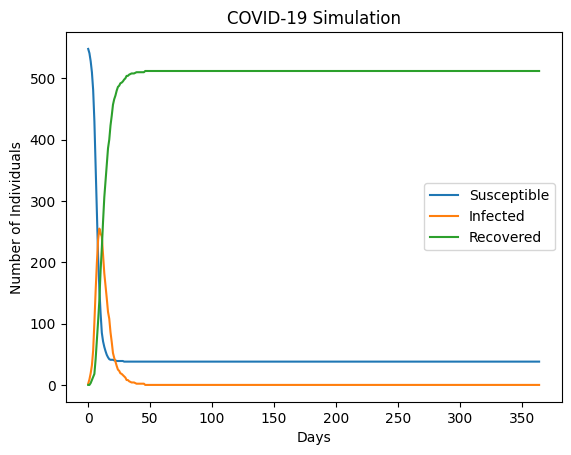

In [61]:
import networkx as nx
import random
import matplotlib.pyplot as plt

def initialize_population(graph, initial_infected):
    population = {}
    for node in graph.nodes():
        population[node] = "S"  # Todos los nodos son susceptibles (S)
    infected_nodes = random.sample(graph.nodes(), initial_infected)
    for node in infected_nodes:
        population[node] = "I"  # Algunos nodos iniciales se marcan como infectados (I)
    return population

def simulate_spread(graph, population, infection_rate, recovery_rate, max_iterations):
    days = []
    susceptible_counts = []
    infected_counts = []
    recovered_counts = []

    for day in range(max_iterations):
        next_population = population.copy()
        susceptible_count = sum(1 for node in graph.nodes() if population[node] == "S")
        infected_count = sum(1 for node in graph.nodes() if population[node] == "I")
        recovered_count = sum(1 for node in graph.nodes() if population[node] == "R")

        days.append(day)
        susceptible_counts.append(susceptible_count)
        infected_counts.append(infected_count)
        recovered_counts.append(recovered_count)

        for node in graph.nodes():
            if population[node] == "I":
                # Nodo infectado
                neighbors = list(graph.neighbors(node))
                for neighbor in neighbors:
                    if population[neighbor] == "S":
                        # Vecino susceptible
                        if random.random() < infection_rate:
                            next_population[neighbor] = "I"  # Se infecta
            if population[node] == "I":
                # Nodo infectado
                if random.random() < recovery_rate:
                    next_population[node] = "R"  # Se recupera
        population = next_population

        if recovered_count == len(graph.nodes()):  # Si todos los nodos se han recuperado, se detiene la simulación
            break

    return days, susceptible_counts, infected_counts, recovered_counts

def plot_simulation(days, susceptible_counts, infected_counts, recovered_counts):
    plt.plot(days, susceptible_counts, label='Susceptible')
    plt.plot(days, infected_counts, label='Infected')
    plt.plot(days, recovered_counts, label='Recovered')
    plt.xlabel('Days')
    plt.ylabel('Number of Individuals')
    plt.title('COVID-19 Simulation')
    plt.legend()
    plt.show()

# Parámetros de simulación
N = 550  # Número de nodos
m = 3  # Número de enlaces que establece cada nodo una vez que se une a la red
initial_infected = 2  # Número inicial de nodos infectados
infection_rate = 0.15  # Tasa de infección
recovery_rate = 0.16  # Tasa de recuperación
max_iterations = 365  # Número máximo de iteraciones

# Generar red Barabasi-Albert
graph = nx.barabasi_albert_graph(N, m)

# Inicializar población
population = initialize_population(graph, initial_infected)

# Simular propagación del COVID-19 y obtener resultados
days, susceptible_counts, infected_counts, recovered_counts = simulate_spread(graph, population, infection_rate, recovery_rate, max_iterations)

# Graficar simulación
plot_simulation(days, susceptible_counts, infected_counts, recovered_counts)

<ipython-input-46-e0704c745594>:9: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  infected_nodes = random.sample(graph.nodes(), initial_infected)


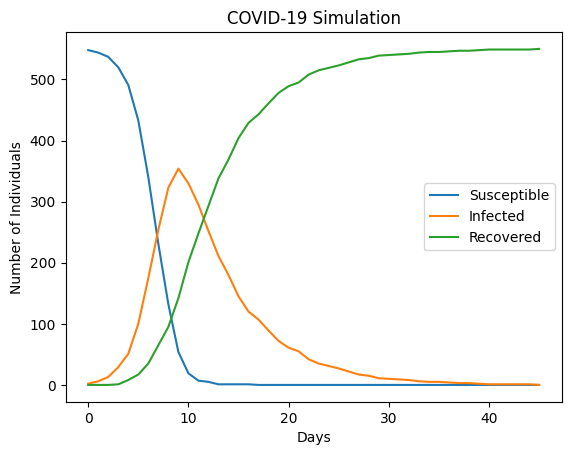

In [46]:
import networkx as nx
import random
import matplotlib.pyplot as plt

def initialize_population(graph, initial_infected):
    population = {}
    for node in graph.nodes():
        population[node] = "S"  # Todos los nodos son susceptibles (S)
    infected_nodes = random.sample(graph.nodes(), initial_infected)
    for node in infected_nodes:
        population[node] = "I"  # Algunos nodos iniciales se marcan como infectados (I)
    return population

def simulate_spread(graph, population, infection_rate, recovery_rate, max_iterations):
    days = []
    susceptible_counts = []
    infected_counts = []
    recovered_counts = []

    for day in range(max_iterations):
        next_population = population.copy()
        susceptible_count = sum(1 for node in graph.nodes() if population[node] == "S")
        infected_count = sum(1 for node in graph.nodes() if population[node] == "I")
        recovered_count = sum(1 for node in graph.nodes() if population[node] == "R")

        days.append(day)
        susceptible_counts.append(susceptible_count)
        infected_counts.append(infected_count)
        recovered_counts.append(recovered_count)

        for node in graph.nodes():
            if population[node] == "I":
                # Nodo infectado
                neighbors = list(graph.neighbors(node))
                for neighbor in neighbors:
                    if population[neighbor] == "S":
                        # Vecino susceptible
                        if random.random() < infection_rate:
                            next_population[neighbor] = "I"  # Se infecta
            if population[node] == "I":
                # Nodo infectado
                if random.random() < recovery_rate:
                    next_population[node] = "R"  # Se recupera
        population = next_population

        if recovered_count == len(graph.nodes()):  # Si todos los nodos se han recuperado, se detiene la simulación
            break

    return days, susceptible_counts, infected_counts, recovered_counts

def plot_simulation(days, susceptible_counts, infected_counts, recovered_counts):
    plt.plot(days, susceptible_counts, label='Susceptible')
    plt.plot(days, infected_counts, label='Infected')
    plt.plot(days, recovered_counts, label='Recovered')
    plt.xlabel('Days')
    plt.ylabel('Number of Individuals')
    plt.title('COVID-19 Simulation')
    plt.legend()
    plt.show()

# Parámetros de simulación
N = 550  # Número de nodos
p = 0.05  # Probabilidad de conexión entre dos nodos
initial_infected = 2  # Número inicial de nodos infectados
infection_rate = 0.05  # Tasa de infección
recovery_rate = 0.16  # Tasa de recuperación
max_iterations = 365  # Número máximo de iteraciones

# Generar red Erdos Renyi
graph = nx.erdos_renyi_graph(N, p)

# Inicializar población
population = initialize_population(graph, initial_infected)

# Simular propagación del COVID-19 y obtener resultados
days, susceptible_counts, infected_counts, recovered_counts = simulate_spread(graph, population, infection_rate, recovery_rate, max_iterations)

# Graficar simulación
plot_simulation(days, susceptible_counts, infected_counts, recovered_counts)